# Fama and French (1993)

[Fama, Eugene F., and Kenneth R. French, 1993, Common risk factors in the returns on stocks and bonds, Journal of Financial Economics 33, 3–5.](https://www.sciencedirect.com/science/article/pii/0304405X93900235)

1. In June of each year $t$, all NYSE stocks on CRSP are ranked on size (price times shares). The median NYSE size is then used to split NYSE, Amex. and (after 1972) NASDAQ stocks into two groups. small and big (S and B). Most Amex and NASDAQ stocks are smaller than the NYSE median, so the small group contains a disproportionate number. 
2. They also break NYSE, Amex, and NASDAQ stocks into three book-to-market equity groups based on the breakpoints for the bottom 30% (Low), middle 40%  (Median), and top 30% (High) of the ranked values of BE/ME for NYSE stocks.
    - BE = book value of stockholder’s equity + balance-sheet deferred taxes and investment tax credit - the book value of preferred stock
    - Book-to-market equity, BE/ME. is then book common equity for the fiscal year ending in calendar year $t-1$, divided by market equity at the end of December of $t-1$.
    - Exclude negative-BE firms.
3. They construct six portfolios (S/L, S/V, S/H, B/L, B/M, B/H) from the intersections of the two ME and the three BE/ME groups. Monthly value-weighted returns on the six portfolios are calculated from **July** of year t to June of $t+1$. and the portfolios are reformed in June of $t+1$. We calculate returns beginning in **July** of the year to be sure that book equity for year $t-1$ is known.
    - They do not include firms until they have appeared on COMPUSTAT for **two** years.

- 资产负债表中的递延税款（Balance - Sheet Deferred Taxes）
- 投资税收抵免（Investment Tax Credit）

## China Step

[Liu, Jianan, Robert F. Stambaugh, and Yu Yuan, 2019, Size and value in China, Journal of Financial Economics 134, 48–69.](https://doi.org/10.1016/j.jfineco.2019.03.008)

2016年，顺丰决定通过反向并购的方式上市。顺丰选择了市值约为3.8亿美元的小型上市公司鼎泰新材作为其壳公司。顺丰与DT达成了并购条款，并于2016年5月DT正式向其股东宣布了该交易。同时，鼎泰新材向中国证券监督管理委员会（CSRC）提交了一份详细的并购提案。该计划规定鼎泰新材向顺丰发行超过30亿股股票，以换取顺丰的全部资产。其意图明确：这30亿股将在发行后占鼎泰新材股票的97%。凭借这些股票，顺丰将有效成为DT的唯一所有者，而鼎泰新材将持有顺丰的所有资产。鼎泰新材将基本上成为与之前相同的顺丰公司，但具备公开交易的地位。并购授权过程顺利。到2016年10月，在申请提交五个月后，CSRC给予了有条件批准，最终授权在两个月后获得。合并后的公司于2017年2月在深圳证券交易所以顺丰的名义交易。同月，2015年批次的首次公开募股（IPO）申请者刚开始进行初步审核。

整个SF-DT过程不到一年，这在反向并购中相当典型。然而，反向并购的速度较快是有代价的。除了常规的投资银行和审计费用外，私人公司还需承担控制公共壳公司的成本。在SF-DT案例中，DT保留了新上市SF公司3%的股份，价值约9.38亿美元。


1. Eliminate the smallest (total value) 30% of stocks to avoid their shell-value contamination, and we use the remaining stocks to form factors.
2. Follow the procedure used by [Fama and French (1993)](https://doi.org/10.1016/0304-405X(93)90023-5). Specifically, each month, we separate the remaining 70% of stocks into two size groups, small (S) and big (B), split at the median market value of that universe. We also break that universe into three EP groups: top 30% (value, V), middle 40% (middle, M), and bottom 30% (growth, G).
3. We then use the inter-sections of those groups to form value-weighted portfolios for the six resulting size-EP combinations: S/V, S/M, S/G, B/V, B/M, and B/G. When forming value-weighted portfolios, here and throughout the study, we weight each stock by the market capitalization of all its outstanding A shares, including nontradable shares.
4. The size and value factors denoted as SMB (small-minus-big) and VMG (value-minus-growth), combine the returns on these six portfolios as follows:
    
    $$
    \begin{aligned}&S M B=\frac{1}{3}(S / V+S / M+S / G)-\frac{1}{3}(B / V+B / M+B / G) \\&V M G=\frac{1}{2}(S / V+B / V)-\frac{1}{2}(S / G+B / G)\end{aligned}
    $$
    
5. The market factor, MKT, is the return on the value-weighted portfolio of our universe, the top 70% of stocks, in excess of the one-year deposit interest rate.

In [1]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

from pandas.tseries.offsets import MonthEnd

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [2]:
cross = pd.read_csv('datasets/ret_mon_python2023.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['month'], format='%Y-%m-%d') + MonthEnd(1)
# 补齐股票代码 如果不满6位 在前面补上0
cross['Stkcd'] = cross['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
cross['w'] = 1
cross = cross.dropna(subset=['ret','totalvalue'])
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w
1,000001,1991-05-31,38.34,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,1
2,000001,1991-06-30,33.99,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,1
3,000001,1991-07-31,29.54,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,1
4,000001,1991-08-31,15.00,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,1
5,000001,1991-09-30,14.50,6,24.0,6.523394e+08,1.301399e+09,20.296075,20.986706,-0.033333,0.006092,-0.039425,0.849080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752023,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1
752024,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1
752025,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1
752026,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1


In [3]:
EP = pd.read_csv('datasets/EP2023.csv')
EP['month'] = pd.to_datetime(EP['month'], format='%Y-%m-%d') + MonthEnd(1)
EP = EP[['Stkcd','month','ep','ep_recent']]
EP['Stkcd'] = EP['Stkcd'].apply(lambda x: '{:0>6}'.format(x)) # 6位股票代码
EP

,Stkcd,month,ep,ep_recent
0,000001,1991-04-30,NaN,NaN
1,000001,1991-05-31,NaN,NaN
2,000001,1991-06-30,NaN,NaN
3,000001,1991-07-31,NaN,NaN
4,000001,1991-08-31,NaN,NaN
...,...,...,...,...
752023,605599,2023-08-31,0.054878,0.036802
752024,605599,2023-09-30,0.051179,0.034322
752025,605599,2023-10-31,0.058164,0.050524
752026,605599,2023-11-30,0.059760,0.051910


In [4]:
cross = pd.merge(cross, EP, on=['Stkcd','month'], how='left')
cross = cross.dropna(subset=['ep','ep_recent'])
cross

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent
34,000001,1994-03-31,15.05,36,23.0,2.184334e+09,4.054739e+09,21.504577,22.123152,-0.170799,0.008719,-0.179518,0.053739,1,0.067405,0.067405
35,000001,1994-04-30,15.99,37,21.0,2.320765e+09,4.307992e+09,21.565163,22.183738,0.062458,0.008719,0.053739,-0.095648,1,0.063443,0.063443
36,000001,1994-05-31,14.60,38,21.0,2.119022e+09,3.933501e+09,21.474221,22.092796,-0.086929,0.008719,-0.095648,-0.088171,1,0.069483,0.069483
37,000001,1994-06-30,13.44,39,22.0,2.407403e+09,3.620977e+09,21.601814,22.010010,-0.079452,0.008719,-0.088171,-0.056046,1,0.075480,0.075480
38,000001,1994-07-31,8.00,40,18.0,2.292765e+09,3.448549e+09,21.553024,21.961219,-0.047327,0.008719,-0.056046,0.553781,1,0.079254,0.079254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709878,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802
709879,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322
709880,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524
709881,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910


## 删除交易日较少的股票

In [5]:
def calc_past_12m_freq(data, window_months=12):
    """
    计算每个股票每月过去12个月的交易频率之和
    
    参数:
    data: DataFrame, 需要包含 ['Stkcd', 'month', 'Freq'] 列
    window_months: int, 回看的月份数，默认12个月
    
    返回:
    DataFrame 包含 ['Stkcd', 'month', 'N12m'] 列
    """
    results = []
    
    # 按股票分组计算
    for stkcd, group in data.groupby('Stkcd'):
        # 对每个股票的数据按时间排序
        group = group.sort_values('month')
        
        # 对每个月份计算过去12个月的交易频率之和
        for i in range(len(group)):
            current_date = group['month'].iloc[i]
            start_date = current_date - pd.DateOffset(months=window_months-1)  # 往前推11个月(加上当月共12个月)
            
            # 获取时间窗口内的数据
            mask = (group['month'] >= start_date) & (group['month'] <= current_date)
            freq_sum = group.loc[mask, 'Freq'].sum()
            
            results.append({
                'Stkcd': stkcd,
                'month': current_date,
                'N12m': freq_sum
            })
    
    return pd.DataFrame(results)

# 使用方法
freq_sums = calc_past_12m_freq(cross)


In [6]:
cross_new = pd.merge(cross, freq_sums, on=['Stkcd', 'month'], how='left')
cross_new

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,N12m
0,000001,1994-03-31,15.05,36,23.0,2.184334e+09,4.054739e+09,21.504577,22.123152,-0.170799,0.008719,-0.179518,0.053739,1,0.067405,0.067405,23.0
1,000001,1994-04-30,15.99,37,21.0,2.320765e+09,4.307992e+09,21.565163,22.183738,0.062458,0.008719,0.053739,-0.095648,1,0.063443,0.063443,44.0
2,000001,1994-05-31,14.60,38,21.0,2.119022e+09,3.933501e+09,21.474221,22.092796,-0.086929,0.008719,-0.095648,-0.088171,1,0.069483,0.069483,65.0
3,000001,1994-06-30,13.44,39,22.0,2.407403e+09,3.620977e+09,21.601814,22.010010,-0.079452,0.008719,-0.088171,-0.056046,1,0.075480,0.075480,87.0
4,000001,1994-07-31,8.00,40,18.0,2.292765e+09,3.448549e+09,21.553024,21.961219,-0.047327,0.008719,-0.056046,0.553781,1,0.079254,0.079254,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624122,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,222.0
624123,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,242.0
624124,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,243.0
624125,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910,243.0


## 删除30%

In [7]:
fenweishu = pd.DataFrame(
    cross_new.groupby(['month'])['totalvalue'].quantile(0.3))
fenweishu.columns = ['fenweishu_guimo']
fenweishu

,fenweishu_guimo
month,
1991-01-31,1.159622e+08
1991-02-28,5.505114e+07
1991-03-31,3.377500e+07
1991-04-30,3.222500e+07
1991-05-31,3.002500e+07
...,...
2023-08-31,3.756695e+09
2023-09-30,3.756347e+09
2023-10-31,3.736221e+09


In [8]:
cross_new = pd.merge(cross_new,fenweishu,on='month',how='left')
cross_new = cross_new[cross_new['totalvalue'] > cross_new['fenweishu_guimo']]
cross_new

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,N12m,fenweishu_guimo
0,000001,1994-03-31,15.05,36,23.0,2.184334e+09,4.054739e+09,21.504577,22.123152,-0.170799,0.008719,-0.179518,0.053739,1,0.067405,0.067405,23.0,7.076385e+08
1,000001,1994-04-30,15.99,37,21.0,2.320765e+09,4.307992e+09,21.565163,22.183738,0.062458,0.008719,0.053739,-0.095648,1,0.063443,0.063443,44.0,5.862432e+08
2,000001,1994-05-31,14.60,38,21.0,2.119022e+09,3.933501e+09,21.474221,22.092796,-0.086929,0.008719,-0.095648,-0.088171,1,0.069483,0.069483,65.0,6.211901e+08
3,000001,1994-06-30,13.44,39,22.0,2.407403e+09,3.620977e+09,21.601814,22.010010,-0.079452,0.008719,-0.088171,-0.056046,1,0.075480,0.075480,87.0,4.647960e+08
4,000001,1994-07-31,8.00,40,18.0,2.292765e+09,3.448549e+09,21.553024,21.961219,-0.047327,0.008719,-0.056046,0.553781,1,0.079254,0.079254,105.0,3.490603e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624122,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,222.0,3.756695e+09
624123,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,242.0,3.756347e+09
624124,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,243.0,3.736221e+09
624125,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910,243.0,3.908821e+09


In [9]:
# ep是完整的
cross_new = cross_new[(cross_new['Freq'] >= 7) & (cross_new['N12m'] > 120) & (cross_new['Rank'] > 6)]
cross_new = cross_new.dropna(subset=['ep'])
cross_new

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,N12m,fenweishu_guimo
5,000001,1994-08-31,12.50,41,23.0,3.582445e+09,5.388358e+09,21.999311,22.407507,0.562500,0.008719,0.553781,0.143281,1,0.050723,0.050723,128.0,7.468675e+08
6,000001,1994-09-30,14.40,42,22.0,4.282152e+09,6.207388e+09,22.177721,22.549006,0.152000,0.008719,0.143281,-0.230941,1,0.044030,0.044030,150.0,7.914780e+08
7,000001,1994-10-31,11.20,43,19.0,3.330562e+09,4.827969e+09,21.926407,22.297692,-0.222222,0.008719,-0.230941,-0.008719,1,0.056610,0.056610,169.0,6.258511e+08
8,000001,1994-11-30,11.20,44,22.0,3.330562e+09,4.827969e+09,21.926407,22.297692,0.000000,0.008719,-0.008719,-0.073005,1,0.056610,0.056610,191.0,6.042122e+08
9,000001,1994-12-31,10.48,45,22.0,3.116455e+09,4.517599e+09,21.859962,22.231247,-0.064286,0.008719,-0.073005,-0.002994,1,0.060499,0.060499,213.0,5.695092e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624122,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,222.0,3.756695e+09
624123,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,242.0,3.756347e+09
624124,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,243.0,3.736221e+09
624125,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910,243.0,3.908821e+09


## 规模 价值分组

In [10]:
guimo = cross_new.groupby(['month'])['totalvalue'].quantile(0.5).to_frame()
guimo.columns = ['guimo']
guimo

,guimo
month,
1991-06-30,9.808000e+08
1991-07-31,1.084536e+08
1991-08-31,6.632051e+08
1991-09-30,6.313829e+08
1991-10-31,7.644302e+08
...,...
2023-08-31,8.828683e+09
2023-09-30,8.763249e+09
2023-10-31,8.508268e+09


In [11]:
jiazhi = cross_new.groupby(['month'])['ep'].quantile([0.3,0.7]).to_frame()
jiazhi.reset_index(inplace=True)
jiazhi = jiazhi.pivot_table(index='month',columns='level_1',values='ep')
jiazhi.columns = ['jiazhi_30','jiazhi_70']
jiazhi

,jiazhi_30,jiazhi_70
month,,
1991-06-30,0.023583,0.023583
1991-07-31,0.007533,0.015879
1991-08-31,0.002556,0.009436
1991-09-30,0.002698,0.009566
1991-10-31,0.002390,0.008038
...,...,...
2023-08-31,0.008239,0.042809
2023-09-30,0.008598,0.042788
2023-10-31,0.007530,0.043047


# 合并数据

In [12]:
cross_new = pd.merge(cross_new,guimo,on='month',how='left')
cross_new = pd.merge(cross_new,jiazhi,on='month',how='left')
cross_new

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,N12m,fenweishu_guimo,guimo,jiazhi_30,jiazhi_70
0,000001,1994-08-31,12.50,41,23.0,3.582445e+09,5.388358e+09,21.999311,22.407507,0.562500,0.008719,0.553781,0.143281,1,0.050723,0.050723,128.0,7.468675e+08,1.362266e+09,0.012236,0.050723
1,000001,1994-09-30,14.40,42,22.0,4.282152e+09,6.207388e+09,22.177721,22.549006,0.152000,0.008719,0.143281,-0.230941,1,0.044030,0.044030,150.0,7.914780e+08,1.307250e+09,0.018198,0.060208
2,000001,1994-10-31,11.20,43,19.0,3.330562e+09,4.827969e+09,21.926407,22.297692,-0.222222,0.008719,-0.230941,-0.008719,1,0.056610,0.056610,169.0,6.258511e+08,1.085000e+09,0.027239,0.079492
3,000001,1994-11-30,11.20,44,22.0,3.330562e+09,4.827969e+09,21.926407,22.297692,0.000000,0.008719,-0.008719,-0.073005,1,0.056610,0.056610,191.0,6.042122e+08,1.114750e+09,0.027193,0.079674
4,000001,1994-12-31,10.48,45,22.0,3.116455e+09,4.517599e+09,21.859962,22.231247,-0.064286,0.008719,-0.073005,-0.002994,1,0.060499,0.060499,213.0,5.695092e+08,1.020912e+09,0.028909,0.083968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415419,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,222.0,3.756695e+09,8.828683e+09,0.008239,0.042809
415420,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,242.0,3.756347e+09,8.763249e+09,0.008598,0.042788
415421,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,243.0,3.736221e+09,8.508268e+09,0.007530,0.043047
415422,605599,2023-11-30,13.48,27,22.0,7.908417e+09,1.048444e+10,22.791193,23.073159,-0.026715,0.001241,-0.027956,0.103358,1,0.059760,0.051910,243.0,3.908821e+09,8.774732e+09,0.006710,0.042006


In [13]:
# note the totalvale > guimo will be big, else small
# note the ep > jiazhi_70 will be value, else > jiazhi_30 will be median, else growth
cross_new['size'] = np.where(cross_new['totalvalue'] > cross_new['guimo'],'B','S')
cross_new['value'] = np.where(cross_new['ep'] > cross_new['jiazhi_70'],'V',
                              np.where(cross_new['ep'] > cross_new['jiazhi_30'],'M','G'))
cross_new = cross_new.dropna(subset=['next_ret','totalvalue'])
cross_new

,Stkcd,month,price,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,w,ep,ep_recent,N12m,fenweishu_guimo,guimo,jiazhi_30,jiazhi_70,size,value
0,000001,1994-08-31,12.50,41,23.0,3.582445e+09,5.388358e+09,21.999311,22.407507,0.562500,0.008719,0.553781,0.143281,1,0.050723,0.050723,128.0,7.468675e+08,1.362266e+09,0.012236,0.050723,B,M
1,000001,1994-09-30,14.40,42,22.0,4.282152e+09,6.207388e+09,22.177721,22.549006,0.152000,0.008719,0.143281,-0.230941,1,0.044030,0.044030,150.0,7.914780e+08,1.307250e+09,0.018198,0.060208,B,M
2,000001,1994-10-31,11.20,43,19.0,3.330562e+09,4.827969e+09,21.926407,22.297692,-0.222222,0.008719,-0.230941,-0.008719,1,0.056610,0.056610,169.0,6.258511e+08,1.085000e+09,0.027239,0.079492,B,M
3,000001,1994-11-30,11.20,44,22.0,3.330562e+09,4.827969e+09,21.926407,22.297692,0.000000,0.008719,-0.008719,-0.073005,1,0.056610,0.056610,191.0,6.042122e+08,1.114750e+09,0.027193,0.079674,B,M
4,000001,1994-12-31,10.48,45,22.0,3.116455e+09,4.517599e+09,21.859962,22.231247,-0.064286,0.008719,-0.073005,-0.002994,1,0.060499,0.060499,213.0,5.695092e+08,1.020912e+09,0.028909,0.083968,B,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,605599,2023-07-31,13.92,23,21.0,8.166555e+09,1.082667e+10,22.823313,23.105278,0.053747,0.001241,0.052506,-0.027103,1,0.041298,0.019832,199.0,3.901419e+09,9.315662e+09,0.008352,0.040397,B,V
415419,605599,2023-08-31,13.56,24,23.0,7.955351e+09,1.054667e+10,22.797111,23.079076,-0.025862,0.001241,-0.027103,0.071030,1,0.054878,0.036802,222.0,3.756695e+09,8.828683e+09,0.008239,0.042809,B,V
415420,605599,2023-09-30,14.54,25,20.0,8.530295e+09,1.130889e+10,22.866890,23.148855,0.072271,0.001241,0.071030,-0.048696,1,0.051179,0.034322,242.0,3.756347e+09,8.763249e+09,0.008598,0.042788,B,V
415421,605599,2023-10-31,13.85,26,17.0,8.125488e+09,1.077222e+10,22.818272,23.100237,-0.047455,0.001241,-0.048696,-0.027956,1,0.058164,0.050524,243.0,3.736221e+09,8.508268e+09,0.007530,0.043047,B,V


# 计算交叉分组里的加权收益率

In [14]:
SV = cross_new[(cross_new['size'] == 'S') & (cross_new['value'] == 'V')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
SV.columns = ['SV']
SM = cross_new[(cross_new['size'] == 'S') & (cross_new['value'] == 'M')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
SM.columns = ['SM']
SG = cross_new[(cross_new['size'] == 'S') & (cross_new['value'] == 'G')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
SG.columns = ['SG']
BV = cross_new[(cross_new['size'] == 'B') & (cross_new['value'] == 'V')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
BV.columns = ['BV']
BM = cross_new[(cross_new['size'] == 'B') & (cross_new['value'] == 'M')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
BM.columns = ['BM']
BG = cross_new[(cross_new['size'] == 'B') & (cross_new['value'] == 'G')].groupby(['month']).apply(lambda x: np.average(x['next_ret'],weights=x['totalvalue']),include_groups=False).to_frame()
BG.columns = ['BG']

In [15]:
# 改进后的代码
def weighted_ret(group):
    return np.average(group['next_ret'], weights=group['totalvalue'])

def calc_portfolio_returns(data):
    portfolios = {}
    for size in ['S', 'B']:
        for value in ['V', 'M', 'G']:
            mask = (data['size'] == size) & (data['value'] == value)
            port_name = f'{size}{value}'
            portfolios[port_name] = (data[mask]
                                   .groupby('month')
                                   .apply(weighted_ret,include_groups=False)
                                   .to_frame(name=port_name))
    return pd.concat(portfolios.values(), axis=1)
    
six_portfolio = calc_portfolio_returns(cross_new)
# index is month and plus one month
six_portfolio.index = six_portfolio.index + MonthEnd(1)
six_portfolio = six_portfolio['2000-01':]
six_portfolio

,SV,SM,SG,BV,BM,BG
month,,,,,,
2000-01-31,0.118153,0.124455,0.167598,0.108332,0.176749,0.170767
2000-02-29,0.111271,0.126431,0.150399,0.064749,0.109924,0.160440
2000-03-31,0.104495,0.075740,0.113793,0.033485,0.014677,0.014215
2000-04-30,0.009517,0.019136,0.000081,0.033479,0.016515,0.014719
2000-05-31,0.034380,0.027609,0.048614,0.032781,0.015170,-0.011740
...,...,...,...,...,...,...
2023-08-31,-0.057468,-0.049622,-0.055596,-0.058074,-0.057212,-0.075582
2023-09-30,0.001074,0.003107,0.001164,0.004296,-0.026152,-0.021628
2023-10-31,-0.023966,-0.009946,0.002619,-0.042213,-0.025697,-0.000485


# Size Factor

In [16]:
def calc_factors(portfolios):
    # SMB因子
    smb = ((portfolios['SV'] + portfolios['SM'] + portfolios['SG'])/3 - 
           (portfolios['BV'] + portfolios['BM'] + portfolios['BG'])/3)
    
    # HML因子
    hml = ((portfolios['SV'] + portfolios['BV'])/2 - 
           (portfolios['SG'] + portfolios['BG'])/2)
    
    return pd.DataFrame({
        'SMB': smb,
        'HML': hml
    })

factors = calc_factors(six_portfolio)
factors

,SMB,HML
month,,
2000-01-31,-0.015214,-0.055941
2000-02-29,0.017663,-0.067409
2000-03-31,0.077217,0.004986
2000-04-30,-0.011993,0.014098
2000-05-31,0.024797,0.015143
...,...,...
2023-08-31,0.009394,0.007818
2023-09-30,0.016276,0.012916
2023-10-31,0.012367,-0.034156


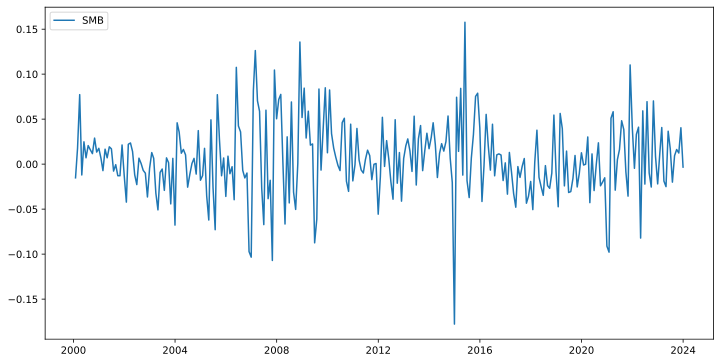

In [17]:
# plot SMB
fig = plt.figure(figsize=(12,6))
plt.plot(factors['SMB'], label='SMB')
plt.legend(loc='upper left')
plt.show();


# Value Factor

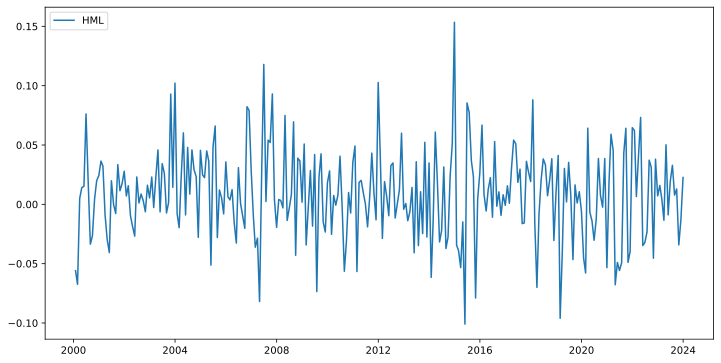

In [18]:
# plot HML
fig = plt.figure(figsize=(12,6))
plt.plot(factors['HML'], label='HML')
plt.legend(loc='upper left')
plt.show();


In [19]:
# summary of the factor
factors[:'2016-12'].describe()
factors[:'2016-12'].corr()

,SMB,HML
count,204.000000,204.000000
mean,0.008493,0.009769
std,0.043100,0.037199
min,-0.177738,-0.100930
25%,-0.012872,-0.011036
50%,0.006842,0.007894
75%,0.028960,0.030999
max,0.157663,0.153417


,SMB,HML
SMB,1.000000,-0.565336
HML,-0.565336,1.000000


In [20]:
# regression
model = smf.ols('SMB ~ 1',
                 data=factors['2000-01':'2016-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SMB   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                nan
Time:                        20:40:09   Log-Likelihood:                 352.46
No. Observations:                 204   AIC:                            -702.9
Df Residuals:                     203   BIC:                            -699.6
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0085      0.003      2.712      0.0

In [21]:
# regression
model = smf.ols('HML ~ 1',
                 data=factors['2000-01':'2016-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    HML   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                nan
Time:                        20:40:12   Log-Likelihood:                 382.50
No. Observations:                 204   AIC:                            -763.0
Df Residuals:                     203   BIC:                            -759.7
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0098      0.003      3.828      0.0

# 价钱的图片

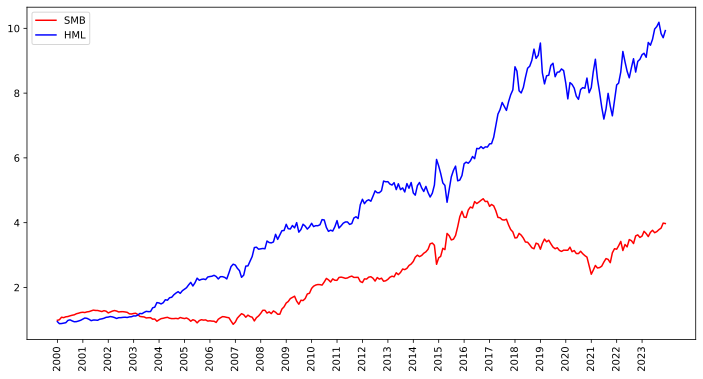

In [22]:
fig = plt.figure(figsize=(12,6))

factors['SMBprice'] = (factors['SMB'] + 1).cumprod()
factors['HMLprice'] = (factors['HML'] + 1).cumprod()

plt.plot(factors['SMBprice'],color='red',label='SMB')
plt.plot(factors['HMLprice'],color='blue',label='HML')
plt.legend(loc='upper left')

xticks = factors.index[::12]
xtick_labels = [label.year for label in xticks]
plt.xticks(xticks, xtick_labels, rotation=90)

plt.show();

# 最大回测

In [23]:
# 计算累积收益率
factors['cumulative_return'] = (1 + factors['SMB']).cumprod()

# 计算滚动最大值
factors['rolling_max'] = factors['cumulative_return'].cummax()

# 计算回撤
factors['drawdown'] = factors['cumulative_return'] / factors['rolling_max'] - 1

# 计算最大回撤
max_drawdown = factors['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")


Maximum Drawdown: -0.49187624458364076


In [24]:
# 找出最大回撤的时间
max_drawdown_end = factors['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = factors.loc[:max_drawdown_end, 'cumulative_return'].idxmax() # 这部分代码选择了从数据开始到 max_drawdown_end 时间点之间的所有累积收益率

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.49187624458364076
Maximum Drawdown Start Date: 2016-10-31 00:00:00
Maximum Drawdown End Date: 2021-01-31 00:00:00


In [48]:
# 计算累积收益率
factors['cumulative_return'] = (1 + factors['HML']).cumprod()

# 计算滚动最大值
factors['rolling_max'] = factors['cumulative_return'].cummax()

# 计算回撤
factors['drawdown'] = factors['cumulative_return'] / factors['rolling_max'] - 1

# 计算最大回撤
max_drawdown = factors['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown}")

Maximum Drawdown: -0.24585871064760811


In [49]:
# 找出最大回撤的时间
max_drawdown_end = factors['drawdown'].idxmin() # 返回 Series 中最小值的索引
max_drawdown_start = factors.loc[:max_drawdown_end, 'cumulative_return'].idxmax() # 这部分代码选择了从数据开始到 max_drawdown_end 时间点之间的所有累积收益率

print(f"Maximum Drawdown: {max_drawdown}")
print(f"Maximum Drawdown Start Date: {max_drawdown_start}")
print(f"Maximum Drawdown End Date: {max_drawdown_end}")

Maximum Drawdown: -0.24585871064760811
Maximum Drawdown Start Date: 2019-01-31 00:00:00
Maximum Drawdown End Date: 2021-07-31 00:00:00
